# CPSC 483-01 Project 3 Boston House Prices Due 3/25/2021
   ## Student Name: Fulya Kocaman
   ## Student ID: 803023878
   
 ## Project 3 Description:

In this project I used scikit-learn and NumPy to implement vectorized linear and polynomial regression models and compare their performance using separate training and test sets of the Boston house-price data. In the training dataset we have 13 variables (from CRIM to LSTAT) and in the test dataset we have a variable called MEDV which is the median value of a home in $1000s. 

I implemented all of the required parts of this project and answered all of the experiment questions in the markdown cells of my code below. As a conclusion, I can say that my code seems to be working fine and predicting accurate results to the given experiment questions. 

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 

## Experiment 1: 
Load the the dataset

In [202]:
with np.load('boston.npz') as data:
    features = data['features']
    target = data['target']

In [203]:
features.size

6578

In [204]:
target.size

506

In [205]:
features.shape

(506, 13)

In [206]:
target.shape

(506,)

## Experiment 2: 
Split the features and target values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing. To make sure that your results are reproducible, pass random_state=(2021-3-11).

In [207]:
 X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=(2021-3-11))

In [208]:
X_train.size

5252

In [209]:
X_test.size

1326

In [210]:
y_train.size

404

In [211]:
y_test.size

102

## Experiment 3: 
Create a scatterplot of the training data showing the relationship between the percentage of the population that is lower status and the median value of a home. Does the relationship appear to be linear? 

In [212]:
lstat_train = X_train[:,12] [:,None] 
lstat_train.size

404

Text(0.5, 1.0, 'MEDV vs LSTAT')

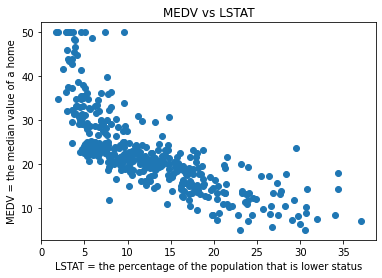

In [213]:
plt.scatter(lstat_train, y_train)
plt.xlabel('LSTAT = the percentage of the population that is lower status')
plt.ylabel('MEDV = the median value of a home' )
plt.title('MEDV vs LSTAT')

## The result of Experiment 3: 
The relationship between the percentage of the population that is lower status and the median value of a home appears to be moderately linear.

## Experiment 4: 
With LSTAT as X and MEDV as y, create and fit() an sklearn.linear_model.LinearRegression model. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a linear function of LSTAT?

In [214]:
reg = LinearRegression().fit(lstat_train, y_train)

In [215]:
coefTrain = reg.coef_
coefTrain

array([-0.98093888])

In [216]:
interceptTrain = reg.intercept_
interceptTrain

34.991133021969475

## The result of Experiment 4: 
The equation for MEDV as a linear function of LSTAT: f(x;w0,w1) = 34.991 - 0.981x

## Experiment 5: 
Use the coef_ and intercept_ attributes of the model to add a line representing the least squares fit to your scatter plot from experiment (3). How well does the model appear to fit the training data?

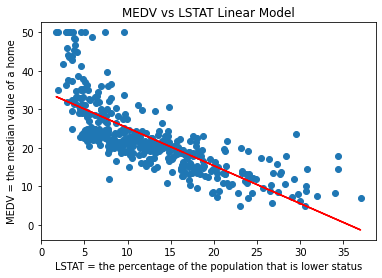

In [217]:
plt.xlabel('LSTAT = the percentage of the population that is lower status')
plt.ylabel('MEDV = the median value of a home' )
plt.title('MEDV vs LSTAT Linear Model')
plt.scatter(lstat_train,y_train)
plt.plot(lstat_train, interceptTrain + coefTrain*lstat_train, 'r') # The line represents the least squares fit  

## The result of Experiment 5:
The model appears to fit moderately well for the training set.

## Experiment 6: 
Use the predict() method of the model to find the response for each value of the LSTAT attribute in the training set. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the training set.

In [218]:
predictedResponses = reg.predict(lstat_train)

In [219]:
lossTraining = mean_squared_error(y_train, predictedResponses)

In [220]:
lossTraining.mean()

38.47893344802523

## The result of Experiment 6: 
The averale loss of the training model with LSTAT attribute is 38.479

## Experiment 7:
Repeat experiment (6) for the test set. How do the training and test MSE values compare?

In [221]:
lstat_test = X_test[:,12] [:,None] 

In [222]:
#reg = LinearRegression().fit(lstat_test, y_test)

In [223]:
coefTest = reg.coef_

In [224]:
interceptTest = reg.intercept_

In [225]:
predictedResponses = reg.predict(lstat_test)

In [226]:
lossTest = mean_squared_error(y_test, predictedResponses)

In [227]:
lossTest.mean()

38.75054664279497

## The result of Experiment 7:
The average loss of the test set with LSTAT attribute is 37.384. The training MSE is slightly higher than the test MSE. This result suggests that this linear model is underfitting the data meaning not a good fit for the data with LSTAT attribute.

## Experiment 8:
Let’s see if we can fit the data better with a more flexible model. Use np.hstack() to add a degree-2 polynomial feature to X, then fit a new linear model. How do the training and test MSE values for this model compare to the previous model?

In [228]:
lstat_train_squared = np.hstack((lstat_train,np.square(lstat_train))) 

In [229]:
reg1 = LinearRegression().fit(lstat_train_squared, y_train)
coefTrain = reg1.coef_
interceptTrain = reg1.intercept_

In [230]:
predictedResponseTraining = reg1.predict(lstat_train_squared)

In [231]:
lossTraining = mean_squared_error(y_train, predictedResponseTraining)

In [232]:
lossTraining.mean()

30.598514349370966

In [233]:
lstat_test = X_test[:,12].reshape(-1, 1)
lstat_test_squared = np.hstack((lstat_test,np.square(lstat_test)))
#reg2 = LinearRegression().fit(lstat_test_squared, y_test)
coefTest = reg1.coef_
interceptTest = reg1.intercept_

In [234]:
predictedResponseTest = reg1.predict(lstat_test_squared)

In [235]:
lossTest = mean_squared_error(y_test, predictedResponseTest)
lossTest.mean()

29.297124138279123

## The result of Experiment 8:
The training MSE dropped from 38.479 to 30.599 and the test MSE also dropped from 37.384 to 29.15. Adding a degree 2 polynomial to the LSTAT feature caused about 20-22% reduction in both MSE values. 

## Experiment 9:
Repeat experiment (5) for your polynomial model.

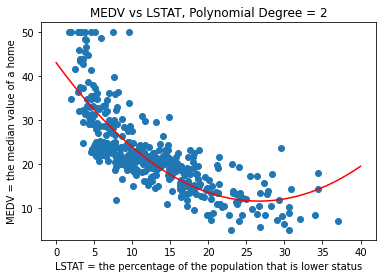

In [236]:
plt.xlabel('LSTAT = the percentage of the population that is lower status')
plt.ylabel('MEDV = the median value of a home' )
plt.title('MEDV vs LSTAT, Polynomial Degree = 2')
plt.scatter(lstat_train,y_train) 

# Generating 100 evenly-spaced random set of x coordinates in order 100 between 0 and 40 considering the range of LSTAT values
testX = np.linspace(0, 40, 100) 

# Finding corresponding y values of the random 100 points using the intercept and coeffients of the polynomial model from experiment (8)
for i in testX:
    predict_y = interceptTrain + coefTrain[0]*testX + coefTrain[1]*(testX**2)
    
plt.plot(testX, predict_y, 'r')

## The result of Experiment 9:
The polynomial model appears to fit better for the training set than the linear model from the experiment (5).

## Experiment 10:
Repeat experiments (4), (6), and (7) using all 13 input features as X. How do the training and test MSEs for this model (which is a linear model including all features) compare to the values you found for experiment (8) (which was a degree-2 polynomial model including a single feature)? What accounts for the difference?

In [237]:
reg = LinearRegression().fit(X_train, y_train)  
predictedResponseTraining = reg.predict(X_train)
lossTraining = mean_squared_error(y_train, predictedResponseTraining)
lossTraining.mean()

21.046340805342368

In [238]:
#reg = LinearRegression().fit(X_test, y_test)
predictedResponseTest = reg.predict(X_test)
lossTest = mean_squared_error(y_test, predictedResponseTest)
lossTest.mean()

25.976408935996655

## The result of Experiment 10:
The training and test MSEs of the linear model including all features are 21.046 and 20.784 respectively. Both the training and test MSEs for this model are smaller compared to the values found for experiment (8) using a degree-2 polynomial model including a single feature. When more features added to the model, the result of this experiment shows that the model can predict better. In our case we have used all 13 features in this model, so this made the linear model predict better by having a smaller loss (MSE) compared to using only one feature on the degree-2 polynomial model as in experiment (8).

## Experiment 11:
Combine experiments (8) and (10), using np.hstack() to add the squares of all 13 input features to X. How do this model’s training and test MSE scores compare to the previous model using all 13 features?

In [239]:
X_train_squared = np.hstack((X_train,np.square(X_train))) 
reg = LinearRegression().fit(X_train_squared, y_train)

predictedResponseTraining = reg.predict(X_train_squared)
lossTraining = mean_squared_error(y_train, predictedResponseTraining)
lossTraining.mean()

13.508100802461723

In [240]:
X_test_squared = np.hstack((X_test,np.square(X_test))) 
#reg = LinearRegression().fit(X_test_squared, y_test)

predictedResponseTest = reg.predict(X_test_squared)
lossTest = mean_squared_error(y_test, predictedResponseTest)
lossTest.mean()

17.857896093014343

## The result of Experiment 11:
The training and test MSEs of the degree-2 polynomial model including all features are 13.508 and 12.683 respectively. Both the training and test MSEs for this model are smaller compared to the previous linear model including all features. This is another indication that shows the degree-2 polynomial model seems to be predict better than a linear model for this dataset.  

## Experiment 12:
Use the fit_transform() method to create degree-2 polynomial and interaction terms for the original set of 13 features, then fit a new linear model. Compare the training and test MSE to the previous model. What is the effect of adding interaction terms in this case? Do we seem to be overfitting?

In [241]:
poly = PolynomialFeatures(degree = 2,interaction_only=True)
X_poly = poly.fit_transform(X_train) 
  
#poly.fit(X_poly, y_train) 
reg = LinearRegression().fit(X_poly, y_train) 

predictedResponseTrain = reg.predict(X_poly)
lossTraining = mean_squared_error(y_train, predictedResponseTrain)
lossTraining.mean()

11.357290563081778

In [242]:
#X_polyTest = poly.fit_transform(X_test) 
  
#poly.fit(X_polyTest, y_test) 
#reg = LinearRegression().fit(X_polyTest, y_test) 

predictedResponseTest = reg.predict(poly.fit_transform(X_test))
lossTest = mean_squared_error(y_test, predictedResponseTest)
lossTest.mean()

30.064456024888532

## The result of Experiment 12:
In this degree-2 polynomial model including interaction terms for the original set of 13 features the training MSE decreased from 13.508 to 11.357 and the test MSE increased from 12.683 to 13.308 compared to the previous degree-2 polynomial model with only addition of the squares of all 13 input features. Adding interaction terms to this model seems to cause higher variance/lower bias and therefore the risk of overfitting seems to be greater due to lower training MSE and higher test MSE. 
